# Imports and Defaults

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmeans import KMeans
from kmedians import KMedians
from single_linkage import SingleLinkage

In [2]:
%load_ext autoreload
%autoreload 2

sns.set_theme() # make plotting pretty

seed = 1 # numpy random number generator from seed
rng = np.random.default_rng(seed)

data_path = 'data' # realtive path to data directory

# Utility Functions

In [3]:
def gaussian_sample(dim, num_gaussians, means, widths, num_data_pts=1000):
    # TODO: code currently ignores dimensions
    
    X = np.zeros(shape=(num_data_pts, 2))
    idx = rng.integers(low=0, high=num_gaussians, size=num_data_pts)
    _, counts = np.unique(idx, return_counts=True)
    
    for i in range(num_gaussians):
        start, stop =  counts[:i].sum(), counts[:i+1].sum()
        X[start:stop] = rng.multivariate_normal(means[i], widths[i]*np.eye(2), size=(counts[i]))
    return X

def euclidean_dist(u,v):
    return np.power(np.power(u - v, 2).sum(), 1/2)

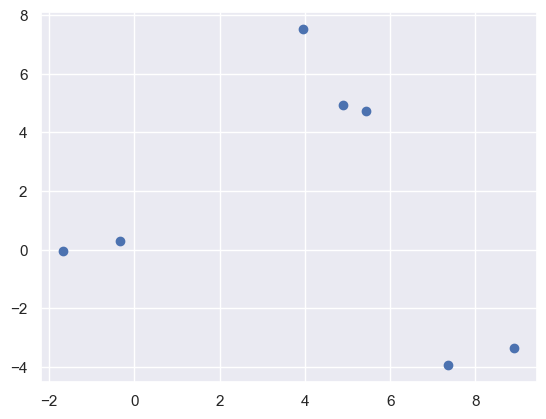

In [18]:
means = np.array([[0,0],
                  [5,5],
                  [8, -4]])
widths = np.array([1, 1, 1])
num_gaussians = len(means)
num_data_pts = 7
dim = None # TODO: currently not relevant to sampling code

X = gaussian_sample(dim, num_gaussians, means, widths, num_data_pts=num_data_pts)
plt.scatter(X[:,0], X[:,1])

# Testing Clustering Algorithms on spherical Gaussian data
K-Means, K-Medians, Single-Linkage Clustering, and Spectral Clustering 

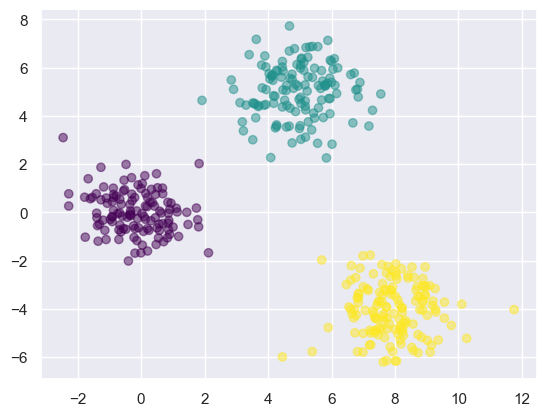

In [5]:
# testing k-medians on Gaussian data
kmedians = KMedians(X, metric=euclidean_dist)
kmedians.fit(k=3)

cluster_assignements = [cluster[0] for cluster in kmedians.assignments]
plt.scatter(X[:,0], X[:,1], c=cluster_assignements, alpha=0.5, cmap='viridis')

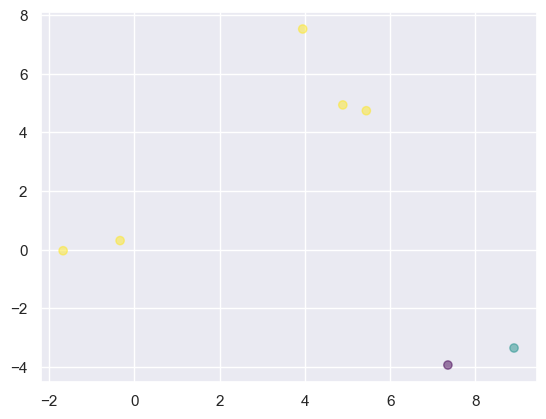

In [49]:
# testing k-means on Gaussian data
kmeans = KMeans(X, metric=euclidean_dist)
kmeans.fit(k=3)

cluster_assignements = [cluster[0] for cluster in kmeans.assignments]
plt.scatter(X[:,0], X[:,1], c=cluster_assignements, alpha=0.5, cmap='viridis')

In [74]:
l3 = [[1, 1], [1, 1]]
l1 = [1, 2, 3]
l2 = [4, 5, 6]
l3.append(l1 + l2)
l3

[[1, 1], [1, 1], [1, 2, 3, 4, 5, 6]]

In [75]:
single_linkage = SingleLinkage(X, metric=euclidean_dist)
single_linkage.fit()

k = 3
single_linkage.dendrogram[k]

8
9
10
11
12
13
14
15
16
17
18
19
20
21


KeyboardInterrupt: 

# HW 1 Dataset

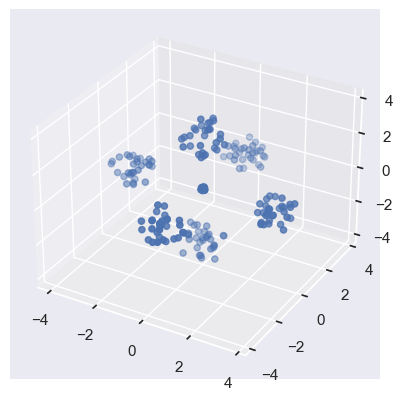

In [182]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])

7 [0 1 2 3 4 5 6] [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


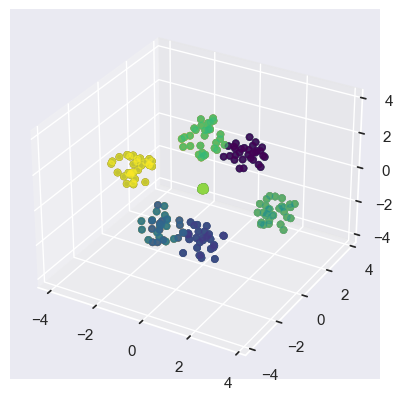

In [282]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

fname = os.path.join(data_path, 'ps1-clustering.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))
for k in range(1, 8):
    kmeans = KMeans(X, k, euclidean_dist)
    kmeans.fit()
    
    cluster_assignements = [cluster[0] for cluster in kmeans.assignments]
    # if k == 7: print(k, np.unique(cluster_assignements), cluster_assignements)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=cluster_assignements, alpha=0.5, cmap='viridis')
    
    